In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

import py_auc

In [2]:
sg = py_auc.Score_generator()
sg.set0('gaussian', 0, 2, 4000)
sg.set1('gaussian', 2, 2, 4000)

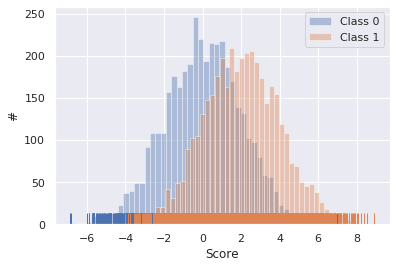

In [3]:
sg.plot()

In [4]:
a = py_auc.AUC(sg.get_asDataFrame())

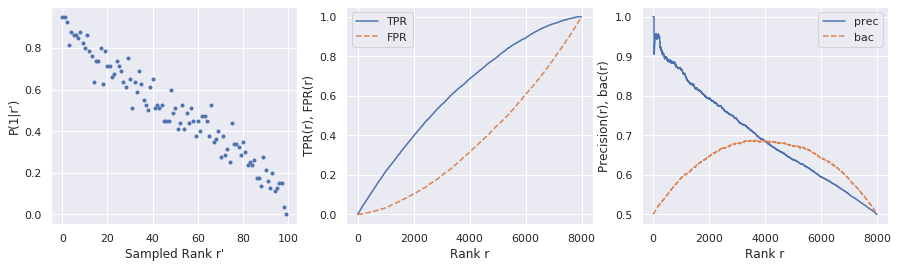

In [5]:
a.plot_rank(sampling=100, filename='rank-gau0-gau2-sig2.pdf')

AUC (area under the ROC curve):    0.761
AUPRC (area under the PRC curve):    0.753


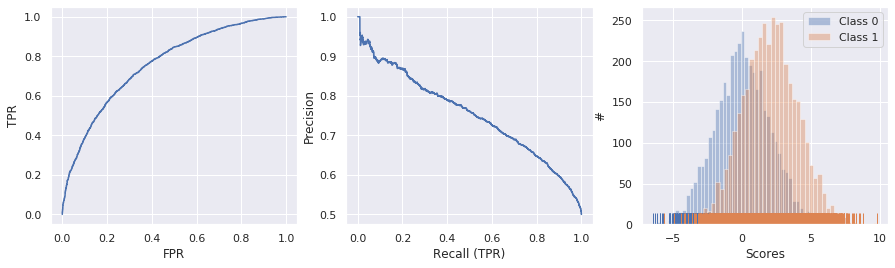

In [5]:
a.plot_ROC(filename='roc-gau0-gau2-sig2.pdf')

AUC (area under the ROC curve):    0.917
AUPRC (area under the PRC curve):    0.918


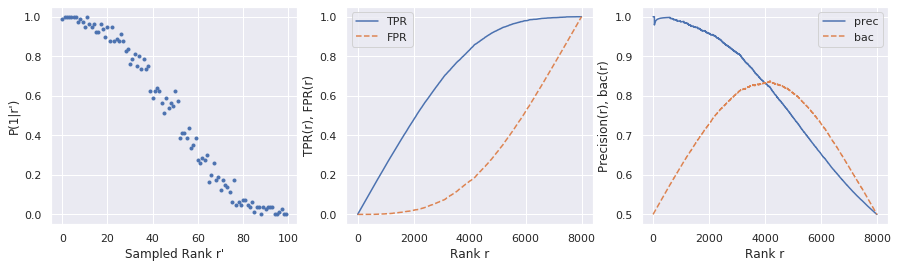

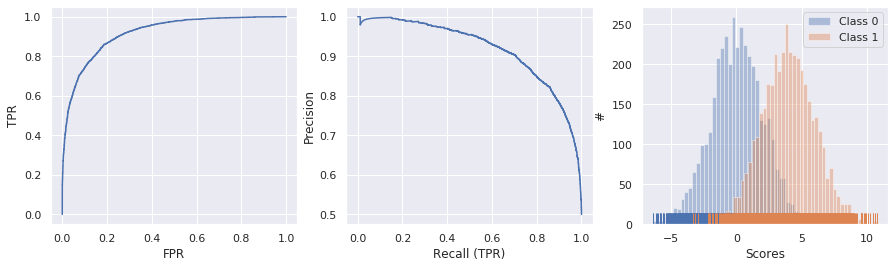

In [17]:
sg.set0('gaussian', 0, 2, 4000)
sg.set1('gaussian', 4, 2, 4000)
a = py_auc.AUC(sg.get_asDataFrame())

a.plot_rank(sampling=100, filename='rank-gau0-gau4-sig2.pdf')
a.plot_ROC(filename='roc-gau0-gau4-sig2.pdf')

AUC (area under the ROC curve):    1.000
AUPRC (area under the PRC curve):    1.000


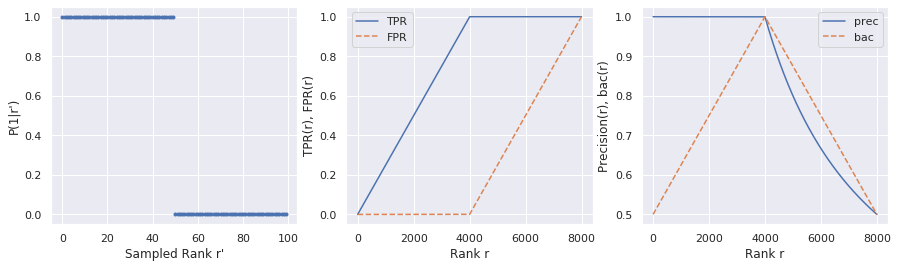

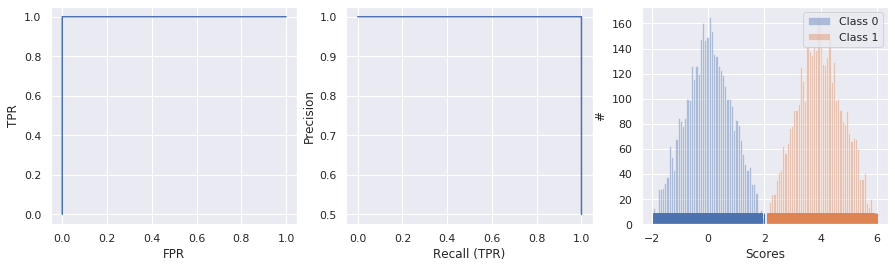

In [19]:
sg.set0('triangle', 0, 2, 4000)
sg.set1('triangle', 4, 2, 4000)
a = py_auc.AUC(sg.get_asDataFrame())

a.plot_rank(sampling=100, filename='rank-tri0-tri4-sig2.pdf')
a.plot_ROC(filename='roc-tri0-tri4-sig2.pdf')

AUC (area under the ROC curve):    0.957
AUPRC (area under the PRC curve):    0.959


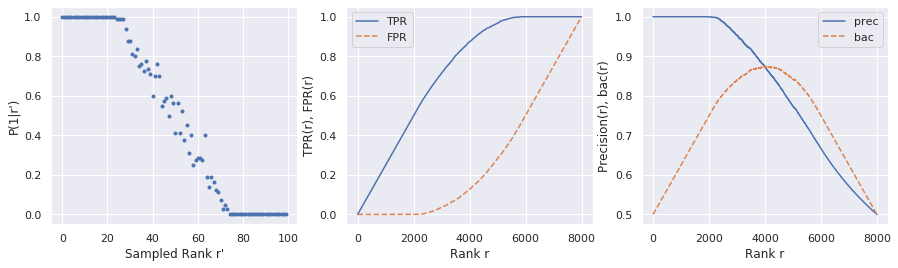

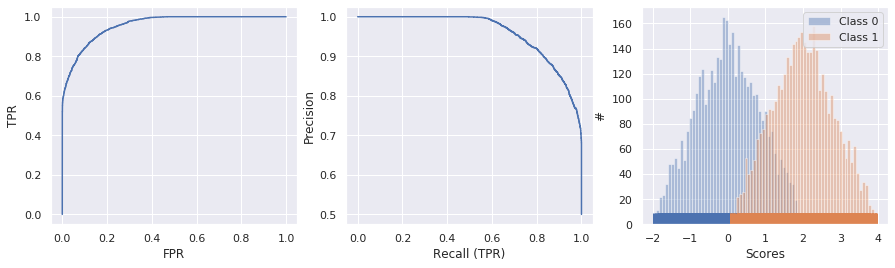

In [20]:
sg.set0('triangle', 0, 2, 4000)
sg.set1('triangle', 2, 2, 4000)
a = py_auc.AUC(sg.get_asDataFrame())

a.plot_rank(sampling=100, filename='rank-tri0-tri2-sig2.pdf')
a.plot_ROC(filename='roc-tri0-tri2-sig2.pdf')

AUC (area under the ROC curve):    0.875
AUPRC (area under the PRC curve):    0.886


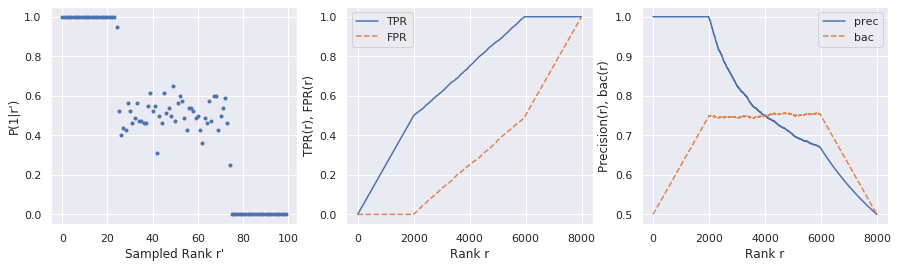

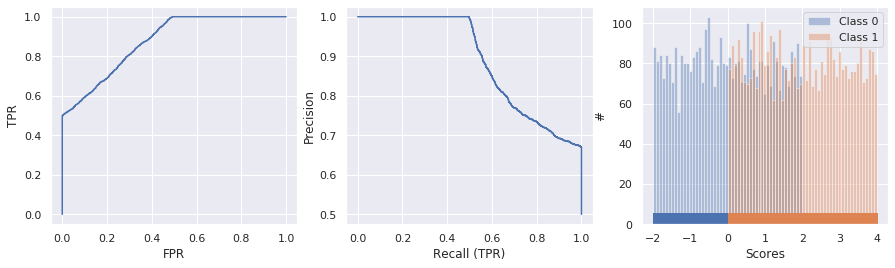

In [21]:
sg.set0('uniform', 0, 2, 4000)
sg.set1('uniform', 2, 2, 4000)
a = py_auc.AUC(sg.get_asDataFrame())

a.plot_rank(sampling=100, filename='rank-uni0-uni2-sig2.pdf')
a.plot_ROC(filename='roc-uni0-uni2-sig2.pdf')

AUC (area under the ROC curve):    0.959
AUPRC (area under the PRC curve):    0.958


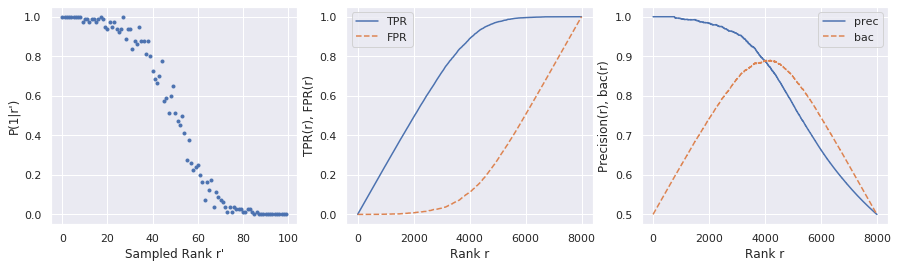

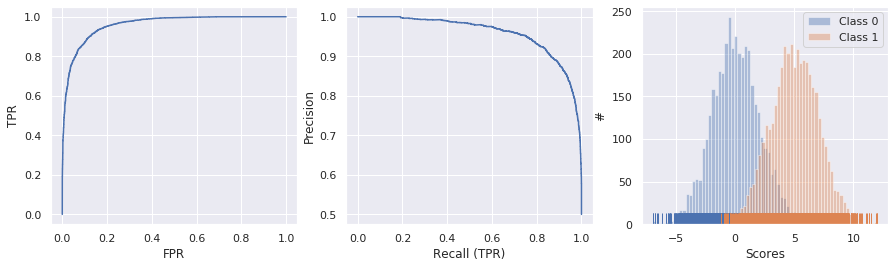

In [22]:
sg.set0('gaussian', 0, 2, 4000)
sg.set1('gaussian', 6, 2, 4000)
a = py_auc.AUC(sg.get_asDataFrame())

a.plot_rank(sampling=100, filename='rank-gau0-gau5-sig2.pdf')
a.plot_ROC(filename='roc-gau0-gau5-sig2.pdf')

In [24]:
sg.get_randomSample(100)

,Score,Class
2570,-2.569440,0.0
2688,0.110048,0.0
1220,1.234387,0.0
3215,-1.182856,0.0
734,-1.382297,0.0
...,...,...
4300,10.206621,1.0
2160,-1.469059,0.0
5454,3.978456,1.0
7712,5.700369,1.0


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)
sns.set_style("ticks")

import py_auc

sg0 = py_auc.Score_generator()
sg0.set0('gaussian', 0, 2, 10000)
sg0.set1('gaussian', 1, 2, 10000)
#sg0.plot(filename='hist-g0-g1-n10000.pdf', show=True)

sg1 = py_auc.Score_generator()
sg1.set0('gaussian', 0, 2, 10000)
sg1.set1('gaussian', 3, 2, 10000)
#sg1.plot(filename='hist-g0-g3-n10000.pdf', show=True)

sg2 = py_auc.Score_generator()
sg2.set0('gaussian', 0, 2, 10000)
sg2.set1('gaussian', 5, 2, 10000)
#sg2.plot(filename='hist-g0-g5-n10000.pdf', show=True)


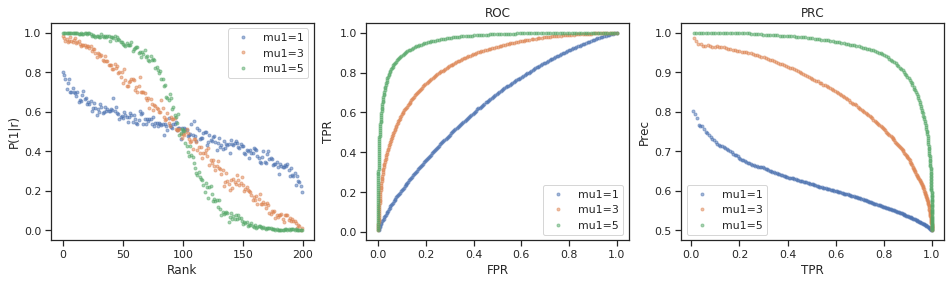

auc0: 0.6383886
auc1: 0.8547406
auc2: 0.9602071999999999


In [20]:
#fig = plt.figure(figsize=(12,5))
axs = sg0.plot_prob(ss=200, sn=500, show=False, label='mu1=1', figsize=(16,4))
axs = sg1.plot_prob(ss=200, sn=500, axs=axs, show=False, label='mu1=3')
axs = sg2.plot_prob(ss=200, sn=500, filename='prob-triple-rho0.5-sn500.pdf', axs=axs, show=True, label='mu1=5')
print('auc0: {}'.format(sg0._auc))
print('auc1: {}'.format(sg1._auc))
print('auc2: {}'.format(sg2._auc))

[0.00867613 0.87184168] 100.48735232433681
[0.02811607 2.81960863] 100.28459384235974
[0.0651404  6.55525643] 100.63272812922068


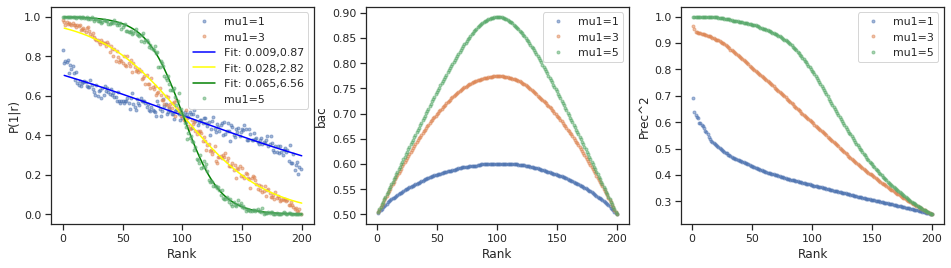

In [23]:
#fig = plt.figure(figsize=(12,5))
axs = sg0.plot_rank(ss=200, sn=500, show=False, label='mu1=1', figsize=(16,4))
axs = sg1.plot_rank(ss=200, sn=500, axs=axs, show=False, label='mu1=3')

from scipy.optimize import curve_fit
def fd(x, lambda1, lambda2):
    return 1./(1.+np.exp(lambda1*x - lambda2))
init_vals = [0.5, 50]  # for [amp, cen, wid]

def plot_fit(sg, ax, color):
    x = sg._sampling['Rank'].values
    best_vals, covar = curve_fit(fd, x, sg._sampling['P(1|r)'], p0=init_vals)
    ax.plot(x, fd(x, best_vals[0], best_vals[1]), color=color, label='Fit: {:.3f},{:.2f}'.format(best_vals[0], best_vals[1]))
    print(best_vals, best_vals[1]/best_vals[0])

plot_fit(sg0, axs[0], 'blue')
plot_fit(sg1, axs[0], 'yellow')
plot_fit(sg2, axs[0], 'green')

axs = sg2.plot_rank(ss=200, sn=500, filename='rank-triple-rho0.5-sn500.pdf', axs=axs, show=True, label='mu1=5')

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)
sns.set_style("ticks")

import py_auc

sg0 = py_auc.Score_generator()
sg0.set0('gaussian', 0, 2, 5000)
sg0.set1('gaussian', 1, 2, 15000)
#sg0.plot(filename='hist-g0-g1-n20000-rho0.75.pdf', show=True)

sg1 = py_auc.Score_generator()
sg1.set0('gaussian', 0, 2, 5000)
sg1.set1('gaussian', 3, 2, 15000)
#sg1.plot(filename='hist-g0-g3-n20000-rho0.75.pdf', show=True)

sg2 = py_auc.Score_generator()
sg2.set0('gaussian', 0, 2, 5000)
sg2.set1('gaussian', 5, 2, 15000)
#sg2.plot(filename='hist-g0-g5-n20000-rho0.75.pdf', show=True)

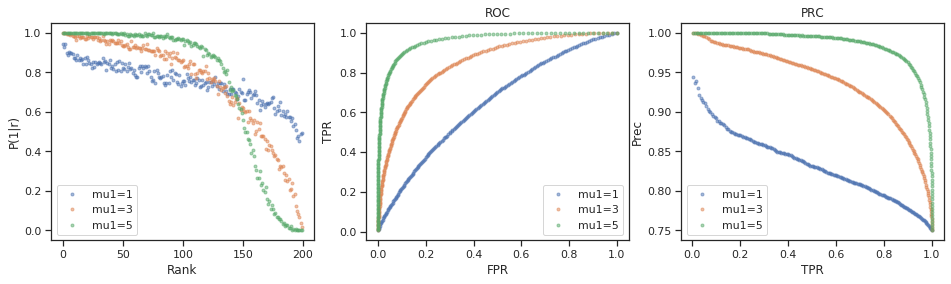

auc0: 0.6439149333333334
auc1: 0.8504370666666666
auc2: 0.9624522666666666


In [27]:
#fig = plt.figure(figsize=(12,5))
axs = sg0.plot_prob(ss=200, sn=500, show=False, label='mu1=1', figsize=(16,4))
axs = sg1.plot_prob(ss=200, sn=500, axs=axs, show=False, label='mu1=3')
axs = sg2.plot_prob(ss=200, sn=500, filename='prob-triple-rho7.5-sn500.pdf', axs=axs, show=True, label='mu1=5')
print('auc0: {}'.format(sg0._auc))
print('auc1: {}'.format(sg1._auc))
print('auc2: {}'.format(sg2._auc))

[0.00879186 2.04881681] 233.03555538041175
[0.03221271 5.15197255] 159.9360413225816
[ 0.08394379 12.8155377 ] 152.66809353889334


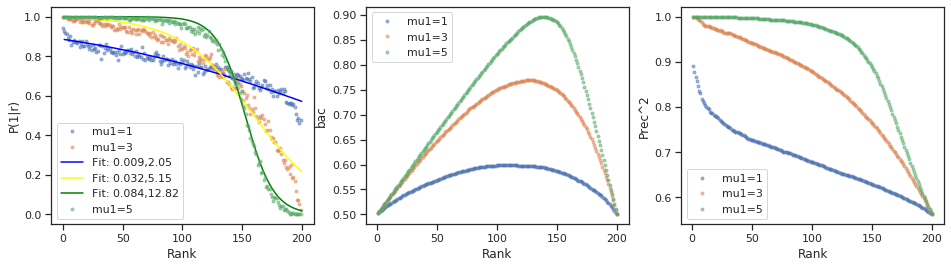

In [28]:
#fig = plt.figure(figsize=(12,5))
axs = sg0.plot_rank(ss=200, sn=500, show=False, label='mu1=1', figsize=(16,4))
axs = sg1.plot_rank(ss=200, sn=500, axs=axs, show=False, label='mu1=3')

from scipy.optimize import curve_fit
def fd(x, lambda1, lambda2):
    return 1./(1.+np.exp(lambda1*x - lambda2))
init_vals = [0.5, 25]  # for [amp, cen, wid]

def plot_fit(sg, ax, color):
    x = sg._sampling['Rank'].values
    best_vals, covar = curve_fit(fd, x, sg._sampling['P(1|r)'], p0=init_vals)
    ax.plot(x, fd(x, best_vals[0], best_vals[1]), color=color, label='Fit: {:.3f},{:.2f}'.format(best_vals[0], best_vals[1]))
    print(best_vals, best_vals[1]/best_vals[0])
    
plot_fit(sg0, axs[0], 'blue')
plot_fit(sg1, axs[0], 'yellow')
plot_fit(sg2, axs[0], 'green')

axs = sg2.plot_rank(ss=200, sn=500, filename='rank-triple-rho7.5-sn500.pdf', axs=axs, show=True, label='mu1=5')

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)
sns.set_style("ticks")

import py_auc

sg0 = py_auc.Score_generator()
sg0.set0('gaussian', 0, 2, 15000)
sg0.set1('gaussian', 1, 2, 5000)
#sg0.plot(filename='hist-g0-g1-n20000-rho0.75.pdf', show=True)

sg1 = py_auc.Score_generator()
sg1.set0('gaussian', 0, 2, 15000)
sg1.set1('gaussian', 3, 2, 5000)
#sg1.plot(filename='hist-g0-g3-n20000-rho0.75.pdf', show=True)

sg2 = py_auc.Score_generator()
sg2.set0('gaussian', 0, 2, 15000)
sg2.set1('gaussian', 5, 2, 5000)
#sg2.plot(filename='hist-g0-g5-n20000-rho0.75.pdf', show=True)

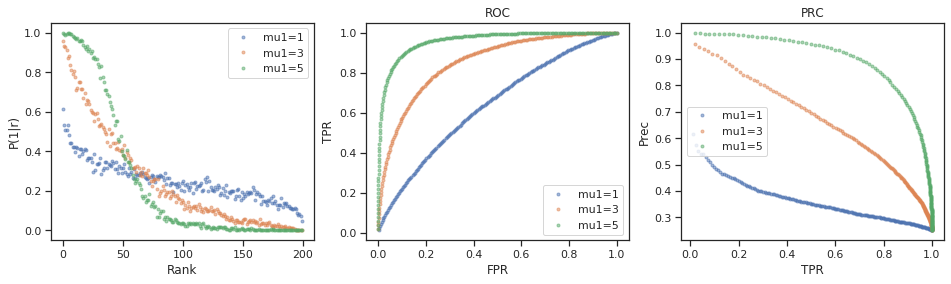

auc0: 0.6390658666666666
auc1: 0.853372
auc2: 0.9598546666666667


In [30]:
#fig = plt.figure(figsize=(12,5))
axs = sg0.plot_prob(ss=200, sn=500, show=False, label='mu1=1', figsize=(16,4))
axs = sg1.plot_prob(ss=200, sn=500, axs=axs, show=False, label='mu1=3')
axs = sg2.plot_prob(ss=200, sn=500, filename='prob-triple-rho2.5-sn500.pdf', axs=axs, show=True, label='mu1=5')
print('auc0: {}'.format(sg0._auc))
print('auc1: {}'.format(sg1._auc))
print('auc2: {}'.format(sg2._auc))

[ 0.00859323 -0.29834022] -34.718052535488816
[0.03227286 1.34013197] 41.52504889232984
[0.08081671 3.90319064] 48.29682661723575


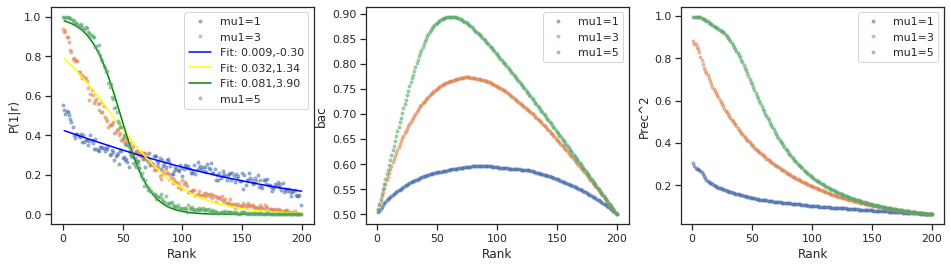

In [31]:
#fig = plt.figure(figsize=(12,5))
axs = sg0.plot_rank(ss=200, sn=500, show=False, label='mu1=1', figsize=(16,4))
axs = sg1.plot_rank(ss=200, sn=500, axs=axs, show=False, label='mu1=3')

from scipy.optimize import curve_fit
def fd(x, lambda1, lambda2):
    return 1./(1.+np.exp(lambda1*x - lambda2))
init_vals = [0.5, 25]  # for [amp, cen, wid]

def plot_fit(sg, ax, color):
    x = sg._sampling['Rank'].values
    best_vals, covar = curve_fit(fd, x, sg._sampling['P(1|r)'], p0=init_vals)
    ax.plot(x, fd(x, best_vals[0], best_vals[1]), color=color, label='Fit: {:.3f},{:.2f}'.format(best_vals[0], best_vals[1]))
    print(best_vals, best_vals[1]/best_vals[0])
    
plot_fit(sg0, axs[0], 'blue')
plot_fit(sg1, axs[0], 'yellow')
plot_fit(sg2, axs[0], 'green')

axs = sg2.plot_rank(ss=200, sn=500, filename='rank-triple-rho2.5-sn500.pdf', axs=axs, show=True, label='mu1=5')

[0.01339018 2.59698253] 193.94683415851148
[0.00481408 1.6019978 ] 332.7732403045081
[0.00723063 1.87032136] 258.6664740321986


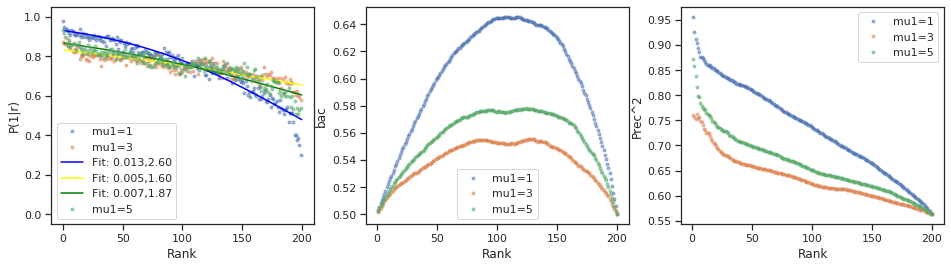

auc0: 0.7005754666666666
auc1: 0.5788410666666667
auc2: 0.6134562666666666


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)
sns.set_style("ticks")

import py_auc

sg0 = py_auc.Score_generator()
sg0.set0('gaussian', 0, 2, 5000)
sg0.set1('gaussian', 1.5, 2, 15000)
#sg0.plot(filename='hist-g0-g1-n20000-rho0.75.pdf', show=True)

sg1 = py_auc.Score_generator()
sg1.set0('gaussian', 0, 2, 5000)
sg1.set1('gaussian', 0.6, 2, 15000)
#sg1.plot(filename='hist-g0-g3-n20000-rho0.75.pdf', show=True)

sg2 = py_auc.Score_generator()
sg2.set0('gaussian', 0, 2, 5000)
sg2.set1('gaussian', 0.8, 2, 15000)
#sg2.plot(filename='hist-g0-g5-n20000-rho0.75.pdf', show=True)

#fig = plt.figure(figsize=(12,5))
axs = sg0.plot_rank(ss=200, sn=500, show=False, label='mu1=1', figsize=(16,4))
axs = sg1.plot_rank(ss=200, sn=500, axs=axs, show=False, label='mu1=3')
sg2.get_classProbability(sampleSize=200, sampleN=500)

from scipy.optimize import curve_fit
def fd(x, lambda1, lambda2):
    return 1./(1.+np.exp(lambda1*x - lambda2))
init_vals = [0.5, 75]  # for [amp, cen, wid]

def plot_fit(sg, ax, color):
    x = sg._sampling['Rank'].values
    best_vals, covar = curve_fit(fd, x, sg._sampling['P(1|r)'], p0=init_vals)
    ax.plot(x, fd(x, best_vals[0], best_vals[1]), color=color, label='Fit: {:.3f},{:.2f}'.format(best_vals[0], best_vals[1]))
    print(best_vals, best_vals[1]/best_vals[0])
    
plot_fit(sg0, axs[0], 'blue')
plot_fit(sg1, axs[0], 'yellow')
plot_fit(sg2, axs[0], 'green')

axs = sg2.plot_rank(ss=200, sn=500, filename='rank-triple-rho0.25-sn500.pdf', axs=axs, show=True, label='mu1=5')

print('auc0: {}'.format(sg0._auc))
print('auc1: {}'.format(sg1._auc))
print('auc2: {}'.format(sg2._auc))

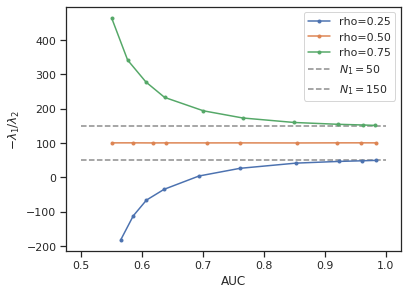

In [65]:
rho25_auc = [0.5645581, 0.58545733, 0.6070832, 0.63612, 0.6933336, 0.76086, 0.85264, 0.9237885, 0.96068, 0.9835631]
rho25_lratio = [-182.9295, -111.94205, -66.157569, -34.718, 3.9937, 26.4082, 41.525, 46.54724, 48.2968, 49.506937]

rho75_auc = [0.549801, 0.576172, 0.606244, 0.63685, 0.7005754, 0.7654306, 0.84975, 0.9216696, 0.96221, 0.98266666]
rho75_lratio = [464.85166, 341.69483, 277.79558, 233.03555, 193.9468, 172.975165, 159.93604, 154.6186386, 152.66809, 151.45317]

rho50_auc = [0.5504541, 0.5844358, 0.6175718, 0.63839, 0.706041, 0.7611582, 0.85474, 0.91949299, 0.96021, 0.9837442]
rho50_lratio = [100.54304, 100.588668, 100.349037, 100.487352, 100.4106875, 100.48126496, 100.284393, 100.573949, 100.632728, 100.540277]

fig = plt.figure(figsize=(6,4.5))
plt.plot(rho25_auc, rho25_lratio, '.-', label='rho=0.25')
plt.plot(rho50_auc, rho50_lratio, '.-', label='rho=0.50')
plt.plot(rho75_auc, rho75_lratio, '.-', label='rho=0.75')
plt.hlines(50, 0.5, 1.0, linestyle='dashed', alpha=0.5, label='$N_1=50$')
plt.hlines(150, 0.5, 1.0, linestyle='dashed', alpha=0.5, label='$N_1=150$')
plt.xlabel('AUC')
plt.ylabel(r'$-\lambda_1/\lambda_2$')
plt.legend()
plt.savefig('chemical_potential.pdf', dpi=150)

In [ ]:
fig = plt.figure(figsize=(6,4.5))
plt.plot(rho25_auc, rho25_lratio, '.-', label='rho=0.25')
plt.plot(rho50_auc, rho50_lratio, '.-', label='rho=0.50')
plt.plot(rho75_auc, rho75_lratio, '.-', label='rho=0.75')
plt.hlines(50, 0.5, 1.0, linestyle='dashed', alpha=0.5, label='$N_1=50$')
plt.hlines(150, 0.5, 1.0, linestyle='dashed', alpha=0.5, label='$N_1=150$')
plt.xlabel('AUC')
plt.ylabel(r'$r^*$')
plt.legend()
plt.savefig('chemical_potential.pdf', dpi=150)

/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
/home/sckim/git_repos/py_auc/py_auc.py:407: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)
/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a ne

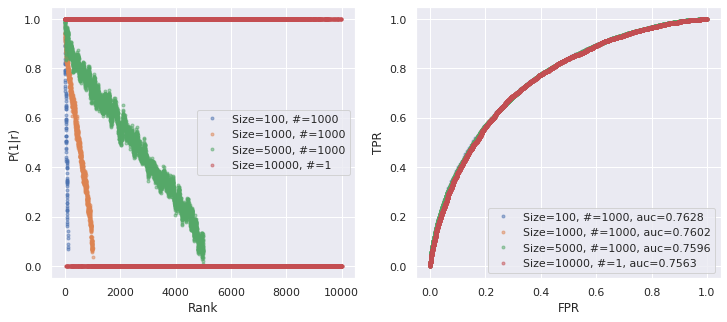

In [4]:
fig = plt.figure(figsize=(12,5))

fig = sg.plot_prob(ss=100, sn=1000, fig=fig)
fig = sg.plot_prob(ss=1000, sn=1000, fig=fig)
fig = sg.plot_prob(ss=5000, sn=1000, fig=fig)

fig = sg.plot_prob(ss=10000, sn=1, filename='prob-g0-g2-sn1000.pdf', fig=fig)

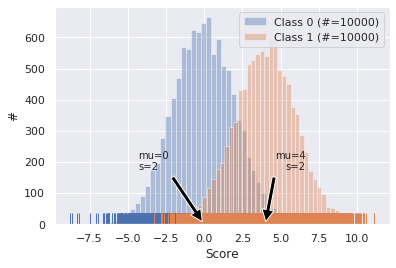

In [5]:
sg = py_auc.Score_generator()
sg.set0('gaussian', 0, 2, 10000)
sg.set1('gaussian', 4, 2, 10000)

sg.plot(filename='hist-g0-g4-n10000.pdf')
plt.show()

/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
/home/sckim/git_repos/py_auc/py_auc.py:407: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)
/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a ne

<Figure size 864x360 with 0 Axes>

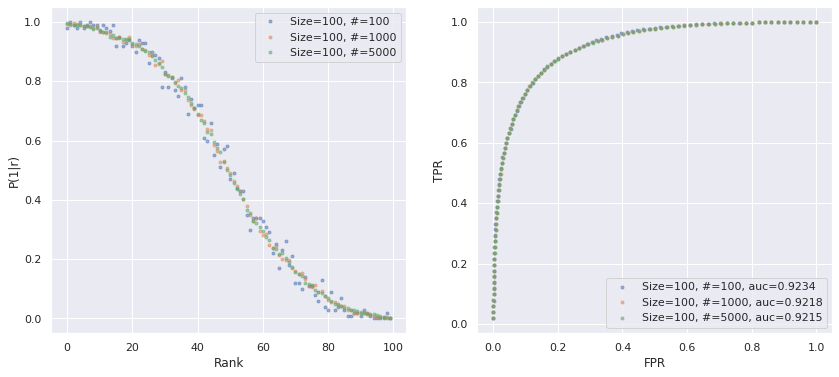

In [6]:
fig = plt.figure(figsize=(12,5))
fig = sg.plot_prob(ss=100, sn=100)
fig = sg.plot_prob(ss=100, sn=1000, fig=fig)
fig = sg.plot_prob(ss=100, sn=5000, filename='prob-g0-g4-ss100.pdf', fig=fig)

/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
/home/sckim/git_repos/py_auc/py_auc.py:407: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)
/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a ne

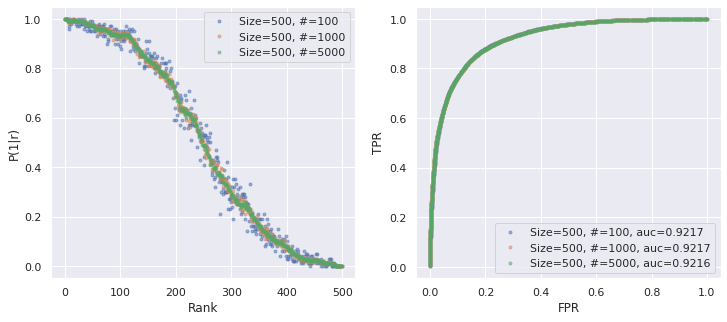

In [7]:
fig = plt.figure(figsize=(12,5))
fig = sg.plot_prob(ss=500, sn=100, fig=fig)
fig = sg.plot_prob(ss=500, sn=1000, fig=fig)
fig = sg.plot_prob(ss=500, sn=5000, filename='prob-g0-g4-sn500.pdf', fig=fig)

/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
/home/sckim/git_repos/py_auc/py_auc.py:407: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)
/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a ne

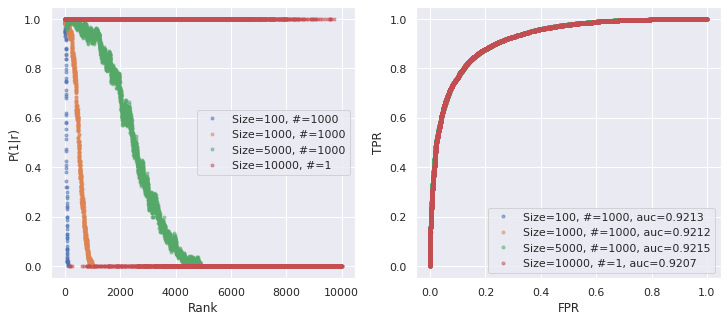

In [8]:
fig = plt.figure(figsize=(12,5))

fig = sg.plot_prob(ss=100, sn=1000, fig=fig)
fig = sg.plot_prob(ss=1000, sn=1000, fig=fig)
fig = sg.plot_prob(ss=5000, sn=1000, fig=fig)

fig = sg.plot_prob(ss=10000, sn=1, filename='prob-g0-g4-sn1000.pdf', fig=fig)

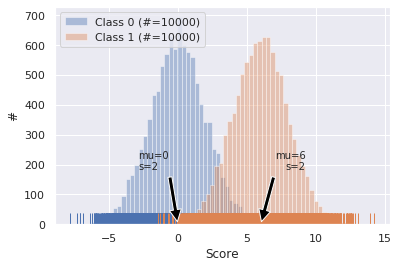

In [9]:
sg = py_auc.Score_generator()
sg.set0('gaussian', 0, 2, 10000)
sg.set1('gaussian', 6, 2, 10000)

sg.plot(filename='hist-g0-g6-n10000.pdf')
plt.show()

/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
/home/sckim/git_repos/py_auc/py_auc.py:407: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)
/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a ne

<Figure size 864x360 with 0 Axes>

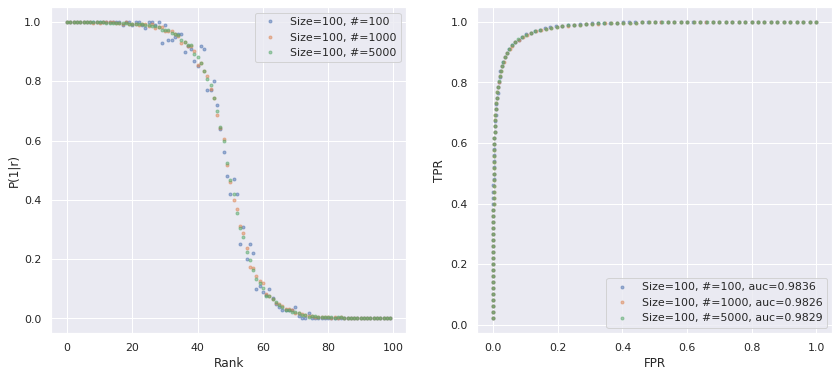

In [10]:
fig = plt.figure(figsize=(12,5))

fig = sg.plot_prob(ss=100, sn=100)
fig = sg.plot_prob(ss=100, sn=1000, fig=fig)
fig = sg.plot_prob(ss=100, sn=5000, filename='prob-g0-g6-ss100.pdf', fig=fig)

/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
/home/sckim/git_repos/py_auc/py_auc.py:407: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)
/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a ne

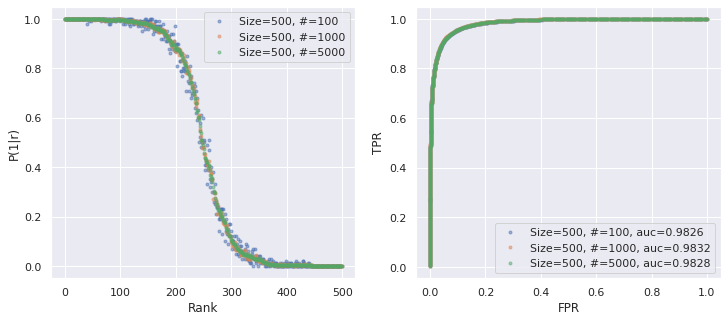

In [11]:
fig = plt.figure(figsize=(12,5))
fig = sg.plot_prob(ss=500, sn=100, fig=fig)
fig = sg.plot_prob(ss=500, sn=1000, fig=fig)
fig = sg.plot_prob(ss=500, sn=5000, filename='prob-g0-g6-sn500.pdf', fig=fig)

/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
/home/sckim/git_repos/py_auc/py_auc.py:407: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)
/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a ne

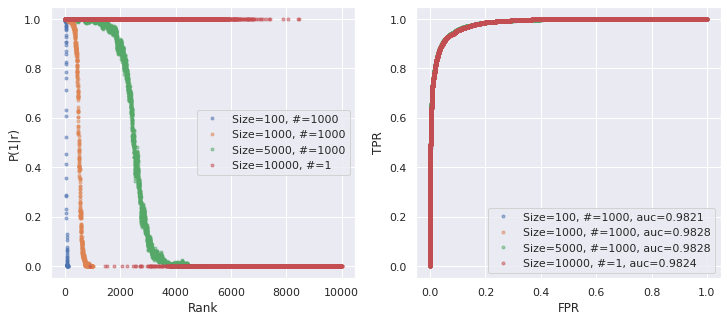

In [12]:
fig = plt.figure(figsize=(12,5))

fig = sg.plot_prob(ss=100, sn=1000, fig=fig)
fig = sg.plot_prob(ss=1000, sn=1000, fig=fig)
fig = sg.plot_prob(ss=5000, sn=1000, fig=fig)

fig = sg.plot_prob(ss=10000, sn=1, filename='prob-g0-g6-sn1000.pdf', fig=fig)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


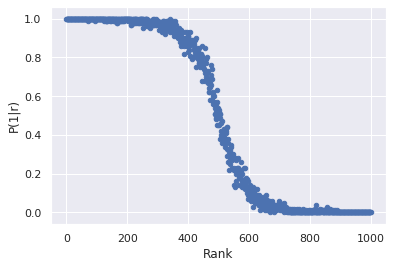

In [13]:
pm = sg.get_classProbability(sampleSize=1000, sampleN=100)
pm.plot(x='Rank', y='P(1|r)', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


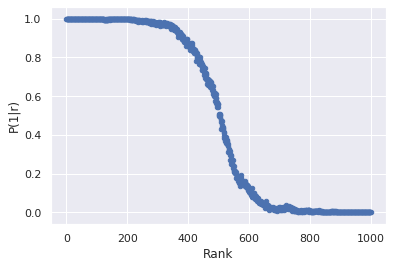

In [20]:
pm = sg.get_classProbability(sampleSize=1000, sampleN=1000)
pm.plot(x='Rank', y='P(1|r)', kind='scatter')

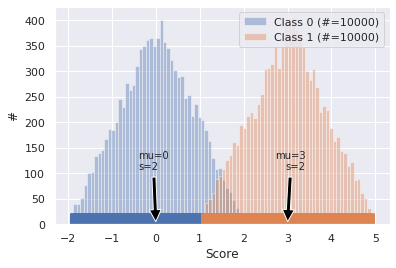

In [14]:
sg = py_auc.Score_generator()
sg.set0('triangle', 0, 2, 10000)
sg.set1('triangle', 3, 2, 10000)

sg.plot(filename='hist-t0-t3-n10000.pdf')
plt.show()

/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
/home/sckim/git_repos/py_auc/py_auc.py:407: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)
/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a ne

<Figure size 864x360 with 0 Axes>

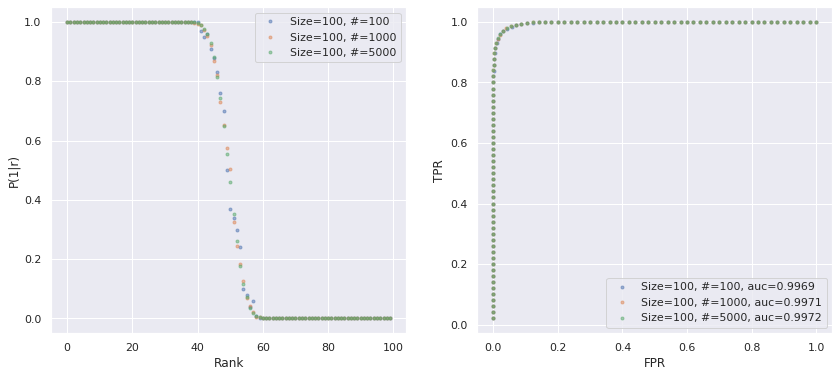

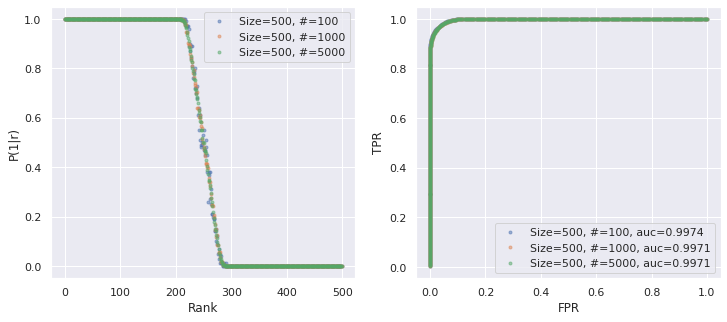

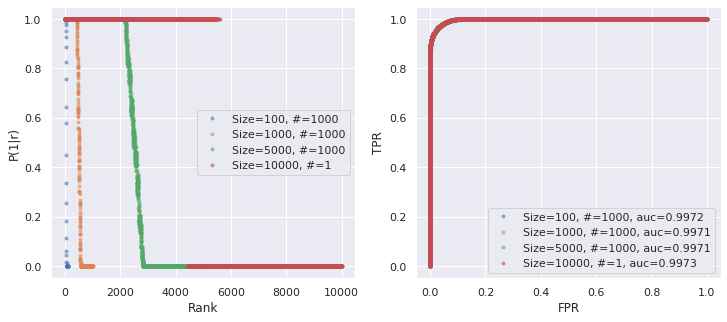

In [16]:
fig = plt.figure(figsize=(12,5))

fig = sg.plot_prob(ss=100, sn=100)
fig = sg.plot_prob(ss=100, sn=1000, fig=fig)
fig = sg.plot_prob(ss=100, sn=5000, filename='prob-t0-t3-ss100.pdf', fig=fig)

fig = plt.figure(figsize=(12,5))
fig = sg.plot_prob(ss=500, sn=100, fig=fig)
fig = sg.plot_prob(ss=500, sn=1000, fig=fig)
fig = sg.plot_prob(ss=500, sn=5000, filename='prob-t0-t3-sn500.pdf', fig=fig)

fig = plt.figure(figsize=(12,5))
fig = sg.plot_prob(ss=100, sn=1000, fig=fig)
fig = sg.plot_prob(ss=1000, sn=1000, fig=fig)
fig = sg.plot_prob(ss=5000, sn=1000, fig=fig)
fig = sg.plot_prob(ss=10000, sn=1, filename='prob-t0-t3-sn1000.pdf', fig=fig)

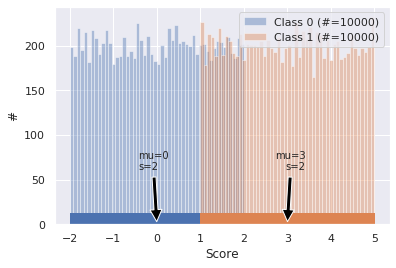

In [17]:
sg = py_auc.Score_generator()
sg.set0('uniform', 0, 2, 10000)
sg.set1('uniform', 3, 2, 10000)

sg.plot(filename='hist-u0-u3-n10000.pdf')
plt.show()

/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(121)
/home/sckim/git_repos/py_auc/py_auc.py:407: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)
/home/sckim/git_repos/py_auc/py_auc.py:399: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a ne

<Figure size 864x360 with 0 Axes>

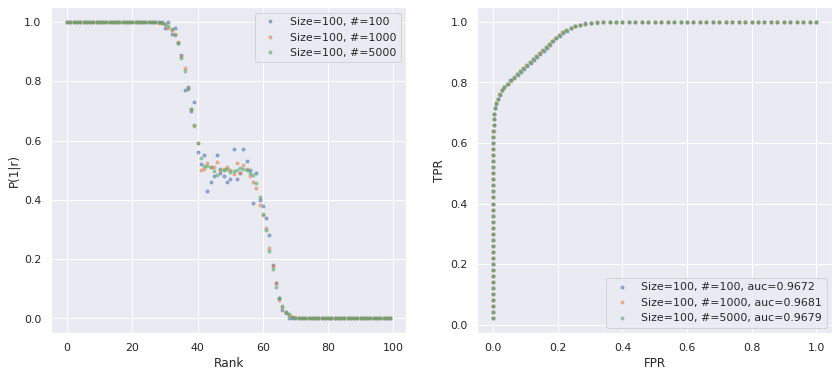

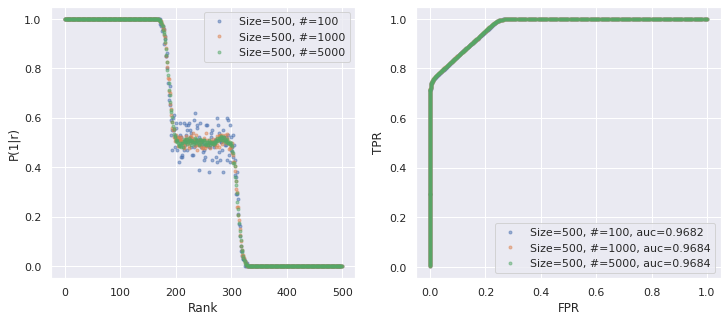

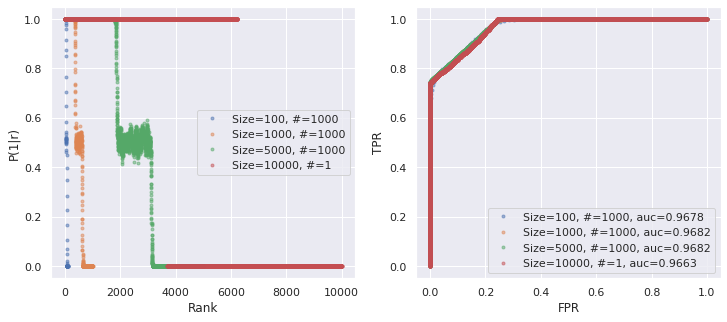

In [18]:
fig = plt.figure(figsize=(12,5))

fig = sg.plot_prob(ss=100, sn=100)
fig = sg.plot_prob(ss=100, sn=1000, fig=fig)
fig = sg.plot_prob(ss=100, sn=5000, filename='prob-u0-u3-ss100.pdf', fig=fig)

fig = plt.figure(figsize=(12,5))
fig = sg.plot_prob(ss=500, sn=100, fig=fig)
fig = sg.plot_prob(ss=500, sn=1000, fig=fig)
fig = sg.plot_prob(ss=500, sn=5000, filename='prob-u0-u3-sn500.pdf', fig=fig)

fig = plt.figure(figsize=(12,5))
fig = sg.plot_prob(ss=100, sn=1000, fig=fig)
fig = sg.plot_prob(ss=1000, sn=1000, fig=fig)
fig = sg.plot_prob(ss=5000, sn=1000, fig=fig)
fig = sg.plot_prob(ss=10000, sn=1, filename='prob-u0-u3-sn1000.pdf', fig=fig)

In [1]:
# Plot r* = -l1/l2 + ln(1-r/r)/l2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)
sns.set_style("ticks")

import py_auc

... generating 15000 positive class
... generating 5000 negative class
... sampling: N 200, M 500, auc 0.9210104000000001
... fitting: initial l2, l1 = [0.1, 15.0]
... fitting: final l2, l1 = [0.05383417 8.32898706]
(-8.328987060599221, 0.05383416752214681)


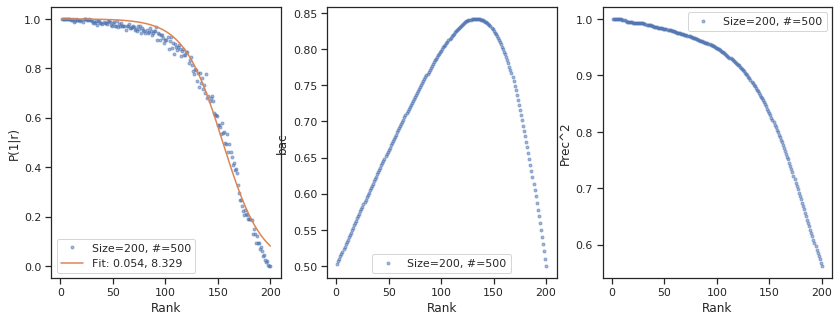

In [3]:
sg0 = py_auc.Score_generator()
sg0._debug = True
sg0.set(n=20000, rho=0.75, kind0='gaussian', mu0=0, std0=2, kind1='gaussian', mu1=4, std1=2)

res = sg0.get_classProbability(sampleSize=200, sampleN=500)
print(sg0.get_lambda(cprob=res, init_vals=None))
sg0.plot_rank(cprob=res)

In [4]:
mus = [0.3, 0.5, 0.7, 1.0, 1.5, 2, 3, 4, 5, 6]
rs = [0.25, 0.5, .75]
fr = np.zeros((3, len(mus), 4))

for j in range(len(rs)):
    for i in range(len(mus)):
        sg0.set(n=20000, rho=rs[j], kind0='gaussian', mu0=0, std0=2, kind1='gaussian', mu1=mus[i], std1=2)
        
        res = sg0.get_classProbability(sampleSize=200, sampleN=500)
        l = sg0.get_lambda(cprob=res)
        fr[j, i, 0] = l[0]
        fr[j, i, 1] = l[1]
        fr[j, i, 2] = (np.log((1-rs[j])/rs[j])-l[0])/l[1]
        fr[j, i, 3] = sg0._auc

... generating 5000 positive class
... generating 15000 negative class
... sampling: N 200, M 500, auc 0.5465197333333334
... fitting: initial l2, l1 = [0.1, 5.0]
... fitting: final l2, l1 = [ 0.00279184 -0.82446558]
... generating 5000 positive class
... generating 15000 negative class
... sampling: N 200, M 500, auc 0.5731645333333333
... fitting: initial l2, l1 = [0.1, 5.0]
... fitting: final l2, l1 = [ 0.00447163 -0.66618683]
... generating 5000 positive class
... generating 15000 negative class
... sampling: N 200, M 500, auc 0.595988
... fitting: initial l2, l1 = [0.1, 5.0]
... fitting: final l2, l1 = [ 0.00589495 -0.53534437]
... generating 5000 positive class
... generating 15000 negative class
... sampling: N 200, M 500, auc 0.6352629333333333
... fitting: initial l2, l1 = [0.1, 5.0]
... fitting: final l2, l1 = [ 0.008374   -0.31517515]
... generating 5000 positive class
... generating 15000 negative class
... sampling: N 200, M 500, auc 0.6984965333333333
... fitting: initial

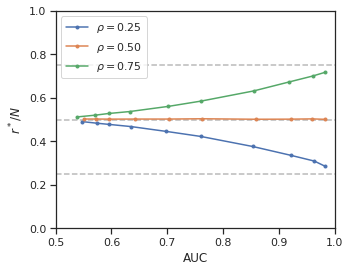

In [16]:
fig = plt.figure(figsize=(5,4))
plt.plot(fr[0, :, 3], fr[0, :, 2]/200, '.-', label=r'$\rho=0.25$')
plt.plot(fr[1, :, 3], fr[1, :, 2]/200, '.-', label=r'$\rho=0.50$')
plt.plot(fr[2, :, 3], fr[2, :, 2]/200, '.-', label=r'$\rho=0.75$')
plt.hlines(0.25, 0.5, 1.0, linestyle='dashed', alpha=0.3)
plt.hlines(0.5, 0.5, 1.0, linestyle='dashed', alpha=0.3)
plt.hlines(0.75, 0.5, 1.0, linestyle='dashed', alpha=0.3)
plt.xlabel('AUC')
plt.ylabel(r'$r^*/N$')
plt.xlim(0.5, 1)
plt.ylim(0, 1)
plt.legend()
plt.savefig('optimum_r.pdf', dpi=150)

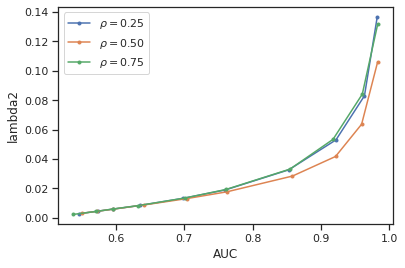

In [6]:
plt.plot(fr[0, :, 3], fr[0, :, 1], '.-', label=r'$\rho=0.25$')
plt.plot(fr[1, :, 3], fr[1, :, 1], '.-', label=r'$\rho=0.50$')
plt.plot(fr[2, :, 3], fr[2, :, 1], '.-', label=r'$\rho=0.75$')
plt.xlabel('AUC')
plt.ylabel('lambda2')
plt.legend()

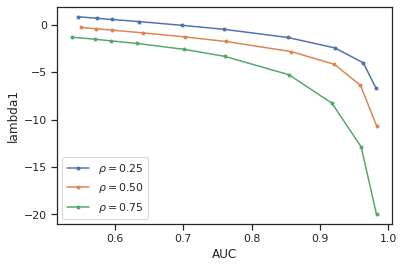

In [7]:
plt.plot(fr[0, :, 3], fr[0, :, 0], '.-', label=r'$\rho=0.25$')
plt.plot(fr[1, :, 3], fr[1, :, 0], '.-', label=r'$\rho=0.50$')
plt.plot(fr[2, :, 3], fr[2, :, 0], '.-', label=r'$\rho=0.75$')
plt.xlabel('AUC')
plt.ylabel('lambda1')
plt.legend()

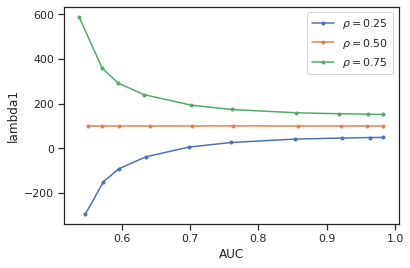

In [8]:
plt.plot(fr[0, :, 3], -fr[0, :, 0]/fr[0, :, 1], '.-', label=r'$\rho=0.25$')
plt.plot(fr[1, :, 3], -fr[1, :, 0]/fr[1, :, 1], '.-', label=r'$\rho=0.50$')
plt.plot(fr[2, :, 3], -fr[2, :, 0]/fr[2, :, 1], '.-', label=r'$\rho=0.75$')
plt.xlabel('AUC')
plt.ylabel('lambda1')
plt.legend()